<a href="https://colab.research.google.com/github/ErikVasconcelos/regressao_python/blob/main/Desafio_4_Reg_Linear_de_Marketing_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Contexto

🔹 Uma empresa está investindo mensalmente em plataformas de publicidade online,
como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas
interessadas em seus produtos).

🔹 A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

🔹 Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.

### Links de Suporte:

🔸 [Python Graph Gallery](https://python-graph-gallery.com/): Repositório com o passo a passo de como
gerar gráficos utilizando as principais bibliotecas de Python.

🔸 [Scikit-Learn](https://scikit-learn.org/stable/modules/clustering.html#clustering): Documentação com os principais modelos utilizados
para clusterização


#### Upload do arquivo (mkt.csv)

In [101]:
# Upload do arquivo (mkt.csv):
from google.colab import files
uploaded = files.upload()

Saving mkt.csv to mkt (5).csv


#### Importando bibliotecas:

In [102]:
%pip install plotly
%pip install cufflinks
%pip install chart_studio

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import plotly.graph_objects as go
import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#### Load data - Carregando arquivo.csv para o colab

In [104]:
df_mkt = pd.read_csv("mkt.csv")

In [133]:
df_mkt

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88
...,...,...,...,...
166,45.84,4.44,16.56,9.12
167,113.04,5.88,9.72,11.64
168,212.40,11.16,7.68,15.36
169,340.32,50.40,79.44,30.60


### 1. Análise Descritiva

In [105]:
df_mkt.info()

# 171 linhas e nenhuma nula. Além disso, todos os tipos estão corretamente direcionados para os respectivos dados (float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [106]:
df_mkt.describe()

# YouTube demonstra ser o canal com maior variabilidade e alcance de investimento ou engajamento. Isso demonstra que, algumas campanhas são muito intensas em relação as outras;
# Facebook possui os valores mais baixos da média e variabilidade, informando que o engajamento ou investimento foi menor em comparação aos outros canais e, em alguns casos não tiveram investimentos, pois possui o valor mínimo como zero;
# Newspaper apresentou uma variabilidade considerável, A mediana está um pouco abaixo da média, sugerindo uma leve assimetria nos dados.

# As vendas parecem ter uma correlação relevante com o investimento nesses canais, no entanto, um estudo mais profundo será necessário para determinar a relação exata.

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


### 2. Análise Exploratória

In [107]:
# Gráfico de BoxPlot: As vendas possuem uma distribuição próxima do centro.
# Porém, não podemos deixar de ressaltar que está com uma tendência de distribuição assimétrica, pois está mais próximo do lado esquerdo da gráfico.

fig = px.box(df_mkt, x = "sales")
fig.update_traces(line_color="blue")

<Axes: xlabel='sales', ylabel='Count'>

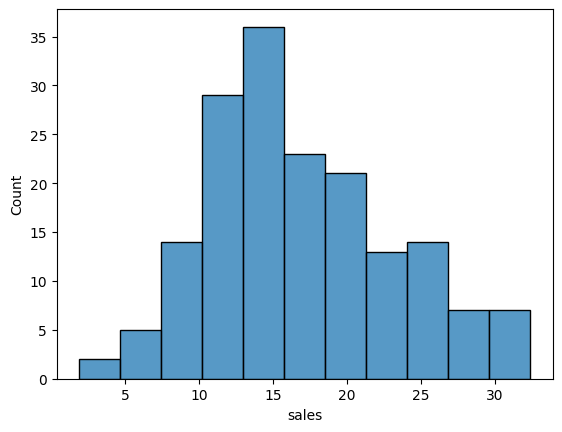

In [108]:
# Histograma: Quanto maior a concentração no meio, menor a dispersão, sendo considerada uma distribuição normal, com tendência de assimetria.
sns.histplot(df_mkt["sales"])

# A distribuição de vendas é um pouco assimétrica negativamente, indicando que a maioria das campanhas gerou vendas relativamente altas, mas algumas poucas campanhas tiveram vendas muito baixas.

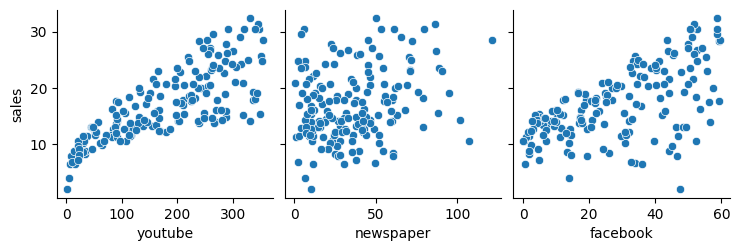

In [109]:
sns.pairplot(df_mkt, x_vars=['youtube', 'newspaper', 'facebook'], y_vars="sales")

# De acordo com as informações citadas no boxplot, o YouTube demonstra ser o canal com maior aproximação de correlação com as vendas.

In [110]:
# Podemos comprovar na tabela a informação supracitada, pois temos o youtube com 0.78 de correlação com a coluna de vendas.

df_mkt.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


### 3. Modelagem

In [111]:
# Definindo as variáveis de modelagem:
x = df_mkt[['youtube', 'facebook', 'newspaper']]
y = df_mkt[["sales"]]

In [112]:
# Definindo os parãmetros de treino:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [113]:
# Definindo a variável de regressão linear:
lm = LinearRegression()

In [114]:
# Treinando os modelos:
lm.fit(x_train, y_train)

LinearRegression()

In [115]:
# Predição do x_test:
y_pred = lm.predict(x_test)

In [116]:
r = r2_score(y_test, y_pred)
print(f'r² = {r}') # 0.88 - Correlação alta - Se as variáveis de teste mudarem, existe 88% de chances de as variáveis preditivas também mudarem.

r² = 0.872863085701216


In [128]:
# Avaliando o desempenho inicial
mse = mean_squared_error(y_test, y_pred)
print(f"MSE do modelo inicial: {mse}")


MSE do modelo inicial: 5.576790234026713


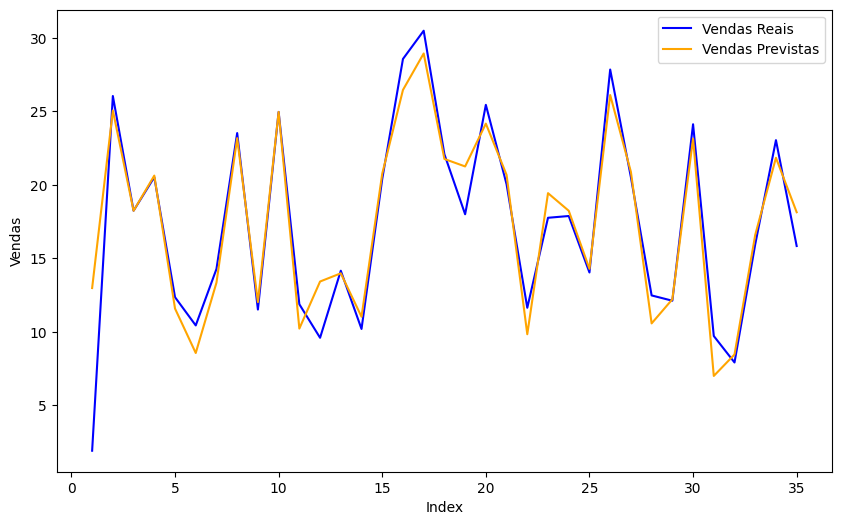

In [117]:
c = [i for i in range(1, len(y_test) + 1)]

fig = plt.figure(figsize=(10, 6))
plt.plot(c, y_test, color="blue", label="Vendas Reais")
plt.plot(c, y_pred, color="orange", label="Vendas Previstas")
plt.xlabel("Index")
plt.ylabel("Vendas")
plt.legend()  # Adiciona uma legenda para identificar as linhas
plt.show()

## Observações sobre o Gráfico:

### Aproximação das Linhas:
As linhas estão próximas uma da outra, isso indica que o modelo está prevendo bem as vendas.

### Próximos Passos:
Ajuste do Modelo: É necessário ajustar o modelo, incluindo mais variáveis, ajustando hiperparâmetros, ou experimentando outros algoritmos de modelagem se necessário.

### Validação Cruzada:
Use técnicas de validação cruzada para garantir que o modelo generalize bem para novos dados e não apenas para o conjunto de dados de teste específico.

### Utilização de outros modelos para aumento de eficiência no resultado esperado

MSE do modelo inicial de modelo 2: 5.576790234026718
MSE do modelo Ridge: 5.58805940084782


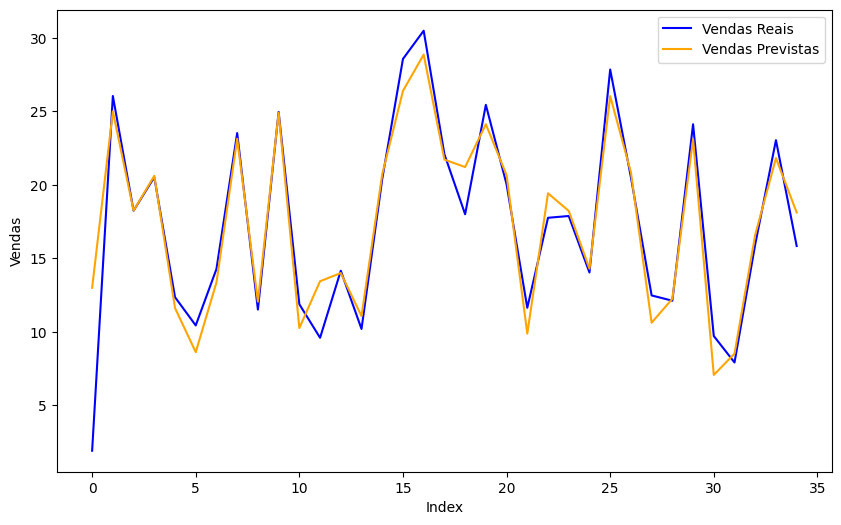

In [130]:
# Definindo as variáveis de modelagem:
x_two = df_mkt[['youtube', 'facebook', 'newspaper']]
y_two = df_mkt[["sales"]]

# Dividindo os dados em conjuntos de treinamento e teste
x_two_train, x_two_test, y_two_train, y_two_test = train_test_split(x_two, y_two, test_size=0.2, random_state=42)

# Escalonamento dos dados para melhorar o desempenho do modelo
scaler = StandardScaler()
x_two_train_scaled = scaler.fit_transform(x_two_train)
x_two_test_scaled = scaler.transform(x_two_test)

scaler = StandardScaler()
x_two_train_scaled = scaler.fit_transform(x_two_train)
x_two_test_scaled = scaler.transform(x_two_test)

model_two = LinearRegression()
model_two.fit(x_two_train_scaled, y_two_train)

# Fazendo previsões
y_two_pred = model_two.predict(x_two_test_scaled)

# Avaliando o desempenho inicial do modelo 2
mse = mean_squared_error(y_two_test, y_two_pred)
print(f"MSE do modelo inicial de modelo 2: {mse}")

# Usando a regularização Ridge
ridge_model = Ridge(alpha=1.0)  # O parâmetro alpha controla a força da regularização
ridge_model.fit(x_two_train_scaled, y_two_train)

# Fazendo previsões com o modelo Ridge
y_two_pred_ridge = ridge_model.predict(x_two_test_scaled)

# Avaliando o desempenho do modelo Ridge
mse_ridge = mean_squared_error(y_two_test, y_two_pred_ridge)
print(f"MSE do modelo Ridge: {mse_ridge}")


plt.figure(figsize=(10, 6))
plt.plot(range(len(y_two_test)), y_two_test, color="blue", label="Vendas Reais")
plt.plot(range(len(y_two_test)), y_two_pred_ridge, color="orange", label="Vendas Previstas")
plt.xlabel("Index")
plt.ylabel("Vendas")
plt.legend()
plt.show()